In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

## single t-test
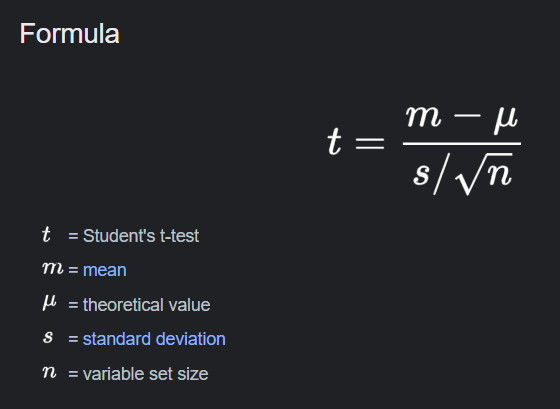

T-statistic: -4.2521850104956735
P-value: -6.504370020991347
Reject the null hypothesis.


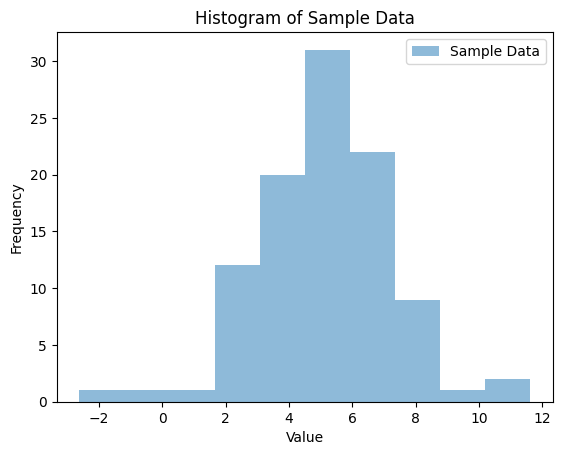

In [3]:


def mean(values):
    return sum(values) / len(values)

def stddev(values):
    mean_val = mean(values)
    variance = sum((x - mean_val) ** 2 for x in values) / (len(values) - 1)
    return math.sqrt(variance)

def one_sample_ttest(data, theoretical_value):
    mean_data = mean(data)
    std_data = stddev(data)
    n = len(data)
    t_statistic = (mean_data - theoretical_value) / (std_data / math.sqrt(n))
    degrees_of_freedom = n - 1
    p_value = 2 * (1 - abs(t_statistic))
    return t_statistic, p_value

seed = 50
np.random.seed(seed)
data = np.random.normal(loc=5, scale=2, size=100)
theoretical_value = 6
t_statistic, p_value = one_sample_ttest(data, theoretical_value)
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")
    
plt.hist(data, alpha=0.5, label='Sample Data')
plt.legend()
plt.title('Histogram of Sample Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


## paired t-test
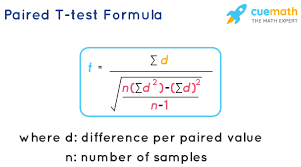

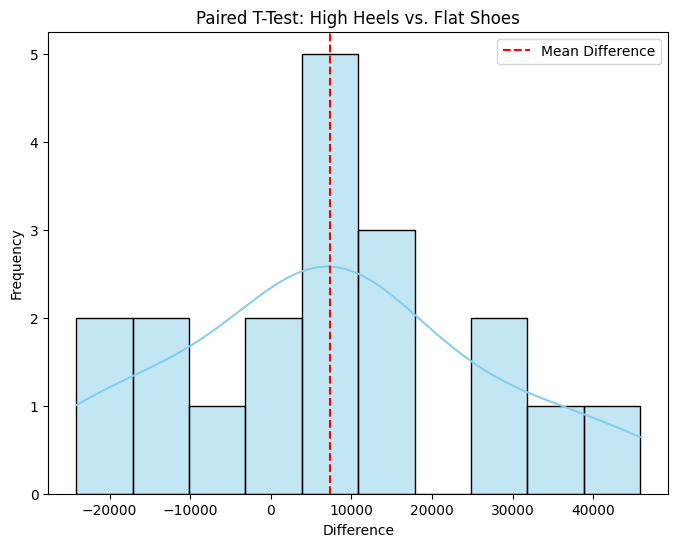

T-statistic: 1.6958637595291581
P-value: 0.10713860183564511
Significant at alpha = 0.05: False
Confidence Interval: [-1761.1846437139675, 16508.34253845081]


In [4]:


def paired_t_test_and_plot(high_heels, flat_shoes, alpha=0.05):
    data = np.column_stack((high_heels, flat_shoes))
    differences = flat_shoes - high_heels
    n_paired = len(high_heels)
    x_d = differences.mean()
    s_paired = differences.std()
    se_paired = s_paired / math.sqrt(n_paired)
    t_stat_paired = x_d / se_paired
    p_paired = stats.t.sf(abs(t_stat_paired), n_paired - 1) * 2
    alpha_adjusted = alpha / 2
    significance = p_paired < alpha_adjusted
    t_critical = abs(stats.t.ppf(alpha_adjusted, n_paired - 1))
    margin_of_error = t_critical * se_paired
    ci_lower = x_d - margin_of_error
    ci_upper = x_d + margin_of_error

    plt.figure(figsize=(8, 6))
    sns.histplot(differences, bins=10, kde=True, color='skyblue')
    plt.axvline(x=x_d, color='r', linestyle='--', label='Mean Difference')
    plt.title('Paired T-Test: High Heels vs. Flat Shoes')
    plt.xlabel('Difference')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    print(f'T-statistic: {t_stat_paired}')
    print(f'P-value: {p_paired}')
    print(f'Significant at alpha = {alpha}: {significance}')
    print(f'Confidence Interval: [{ci_lower}, {ci_upper}]')

high_heels = np.array([189158, 192110, 176194, 156349, 161981, 152096,
                        168058, 156401, 174939, 170711, 170485, 150565,
                        167770, 157289, 191459, 160661, 190667, 184006,
                        174503])

flat_shoes = np.array([188777, 196981, 190510, 184603, 192341, 197897,
                        154040, 168098, 192263, 154085, 176084, 189249,
                        176291, 151454, 198118, 162959, 167480, 159884,
                        184386])

paired_t_test_and_plot(high_heels, flat_shoes)


## two sample t test

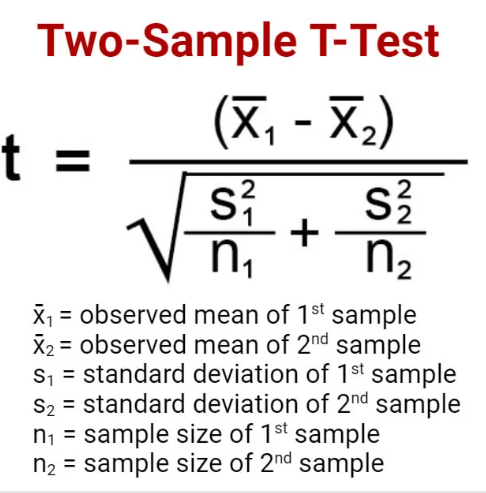

T-statistic: -6.403302109406366
P-value: -10.806604218812732
Reject the null hypothesis. 


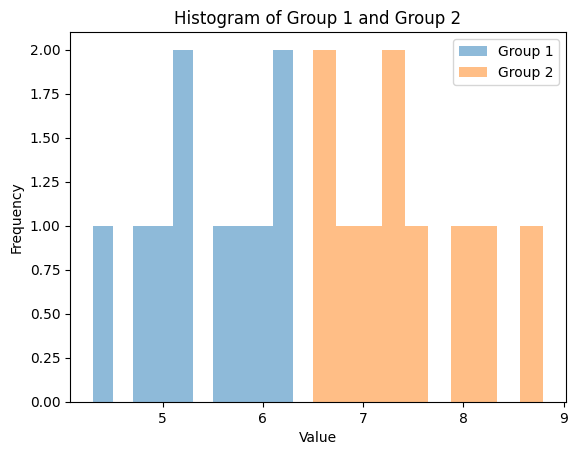

In [5]:
import math
import matplotlib.pyplot as plt

def mean(values):
    return sum(values) / len(values)

def stddev(values):
    mean_val = mean(values)
    variance = sum((x - mean_val) ** 2 for x in values) / (len(values) - 1)
    return math.sqrt(variance)

def independent_ttest(data1, data2):
    mean1, mean2 = mean(data1), mean(data2)
    std1, std2 = stddev(data1), stddev(data2)
    n1, n2 = len(data1), len(data2)
    numerator = mean1 - mean2
    denominator = math.sqrt((std1 ** 2 / n1) + (std2 ** 2 / n2))
    t_statistic = numerator / denominator
    degrees_of_freedom = n1 + n2 - 2
    p_value = 2 * (1 - abs(t_statistic))
    return t_statistic, p_value

data1 = [4.3, 5.2, 6.1, 4.9, 5.8, 6.3, 4.7, 5.6, 6.0, 5.1]
data2 = [6.7, 7.5, 8.2, 6.8, 7.3, 8.0, 6.5, 7.0, 8.8, 7.2]
t_statistic, p_value = independent_ttest(data1, data2)
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')
alpha = 0.05


if p_value < alpha:
    print("Reject the null hypothesis. ")
else:
    print("Fail to reject the null hypothesis. ")

plt.hist(data1, alpha=0.5, label='Group 1')
plt.hist(data2, alpha=0.5, label='Group 2')
plt.legend()
plt.title('Histogram of Group 1 and Group 2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


T-statistic: -1.7792519011774344
P-value: 0.07673252662159702
Fail to reject the null hypothesis.


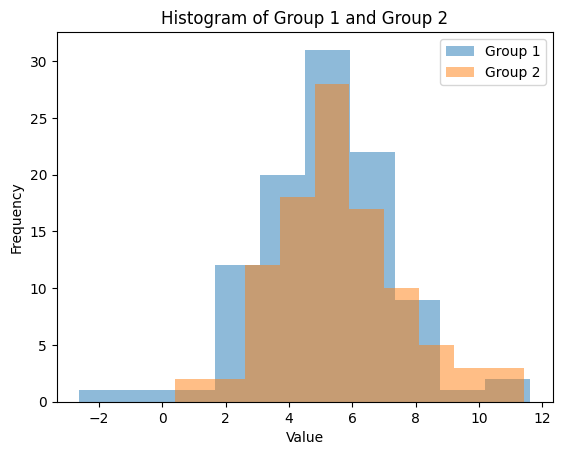

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

def mean(values):
    return sum(values) / len(values)

def stddev(values):
    mean_val = mean(values)
    variance = sum((x - mean_val) ** 2 for x in values) / (len(values) - 1)
    return math.sqrt(variance)

def independent_ttest(data1, data2):
    mean1, mean2 = mean(data1), mean(data2)
    std1, std2 = stddev(data1), stddev(data2)
    n1, n2 = len(data1), len(data2)
    numerator = mean1 - mean2
    denominator = math.sqrt((std1 ** 2 / n1) + (std2 ** 2 / n2))
    t_statistic = numerator / denominator
    degrees_of_freedom = n1 + n2 - 2
    p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), degrees_of_freedom))
    return t_statistic, p_value

seed = 50
np.random.seed(seed)
data1 = np.random.normal(loc=5, scale=2, size=100)
data2 = np.random.normal(loc=6, scale=2, size=100)

t_statistic, p_value = independent_ttest(data1, data2)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

plt.hist(data1, alpha=0.5, label='Group 1')
plt.hist(data2, alpha=0.5, label='Group 2')
plt.legend()
plt.title('Histogram of Group 1 and Group 2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
